# **3.5 Dimensions of the Four Subspaces**

**Four Fundamental Subspaces**
1. The **row space** is $C(A^T)$, a subspace of $\mathbb{R}^n$  
2. The **column space** is $C(A)$, a subspace of $\mathbb{R}^m$  
3. The **nullspace** is $N(A)$, a subspace of $\mathbb{R}^n$  
4. The **left nullspace** is $N(A^T)$, a subspace of $\mathbb{R}^m$. This is our new space  

**Facts**
1. The row space and column space have the same dimension $r$. This number $r$ is the **rank** of the matrix.  
2. $N(A)$ and $N(A^T)$ have dimensions $n-r$ and $m-r$, to make up the full $n$ and $m$.


### **The Four Subspaces for $R$**

- The **dimension of the row space** is the rank $r$. The nonzero rows of $R$ form a basis.  
- The **dimension of the column space** is the rank $r$. The pivot columns form a basis.  
- The **nullspace** has dimension $n-r$. The special solutions form a basis.  
- If $A$ is $m \times n$ of rank $r$, its **left nullspace** has dimension $m-r$.  
- In $\mathbb{R}^n$, the row space and nullspace have dimensions $r$ and $n-r$ (adding to $n$).  
- In $\mathbb{R}^m$, the column space and left nullspace have dimensions $r$ and $m-r$ (total $m$).


In [2]:
import numpy as np

# RREF Engine (Pivot Detector)
def rref(A, tol=1e-12):
    A = A.astype(float).copy()
    m, n = A.shape
    r = 0
    pivot_cols = []

    for c in range(n):
        # Find pivot
        pivot = None
        for i in range(r, m):
            if abs(A[i, c]) > tol:
                pivot = i
                break

        if pivot is None:
            continue

        # Move pivot row
        A[[r, pivot]] = A[[pivot, r]]

        # Normalize pivot row
        A[r] /= A[r, c]

        # Eliminate
        for i in range(m):
            if i != r:
                A[i] -= A[i, c] * A[r]

        pivot_cols.append(c)
        r += 1

        if r == m:
            break

    return A, pivot_cols


# Nullspace via RREF Pivot/Free Vars
def nullspace(A, tol=1e-12):
    m, n = A.shape
    _, pivots = rref(A, tol)

    free = [j for j in range(n) if j not in pivots]
    if not free:
        return []  # only the zero vector

    A_rref, _ = rref(A)

    basis = []
    for f in free:
        v = np.zeros(n)
        v[f] = 1
        for p in pivots[::-1]:
            v[p] = -A_rref[p, f]
        basis.append(v.tolist())
    return basis


# Column & Row Space via pivot columns
def column_space(A, tol=1e-12):
    A = np.array(A, dtype=float)
    _, pivots = rref(A)
    return [A[:, p].tolist() for p in pivots]


def row_space(A, tol=1e-12):
    A = np.array(A, dtype=float)
    A_rref, pivots = rref(A)
    return [A_rref[p, :].tolist() for p in pivots]


# MAIN WRAPPER: Four Fundamental Subspaces
def four_fundamental_subspaces(A):
    A = np.array(A, dtype=float)
    return {
        "C(A)": column_space(A),
        "C(A^T)": column_space(A.T),
        "N(A)": nullspace(A),
        "N(A^T)": nullspace(A.T),
    }

def demo_four_subspaces(A):
    spaces = four_fundamental_subspaces(A)

    print("\nCOLUMN SPACE C(A)")
    for v in spaces["C(A)"]:
        print(v)

    print("\nROW SPACE C(A^T)")
    for v in spaces["C(A^T)"]:
        print(v)

    print("\nNULL SPACE N(A)")
    if spaces["N(A)"]:
        for v in spaces["N(A)"]:
            print(v)
    else:
        print("[0]  (only the zero vector)")

    print("\nLEFT NULL SPACE N(A^T)")
    if spaces["N(A^T)"]:
        for v in spaces["N(A^T)"]:
            print(v)
    else:
        print("[0]  (only the zero vector)")


A = [
    [1, 2, 3],
    [2, 4, 6],
    [1, 1, 0]
]

demo_four_subspaces(A)


COLUMN SPACE C(A)
[1.0, 2.0, 1.0]
[2.0, 4.0, 1.0]

ROW SPACE C(A^T)
[1.0, 2.0, 3.0]
[1.0, 1.0, 0.0]

NULL SPACE N(A)
[3.0, -3.0, 1.0]

LEFT NULL SPACE N(A^T)
[-2.0, 1.0, -0.0]


### **The Four Subspaces for $A$**

**Dimensions of the Four Fundamental Subspaces (for $R$ and $A$)**

1. $A$ has the same row space as $R$ — same dimension $r$ and same basis.  
2. The column space of $A$ has dimension $r$. The **column rank** equals the **row rank**.  
   - **Rank Theorem:** The number of independent columns = the number of independent rows.  
   - $Ax = 0$ exactly when $Rx = 0$.  
3. $A$ has the same nullspace as $R$ — same dimension $n-r$ and same basis.  
   - **Counting rule for $N(A)$:** $r + (n-r) = n$  
   - $(\text{dimension of column space}) + (\text{dimension of nullspace}) = \dim(\mathbb{R}^n)$  
4. The left nullspace of $A$ (the nullspace of $A^T$) has dimension $m-r$.  
   - **Counting rule for $N(A^T)$:** $r + (m-r) = m$

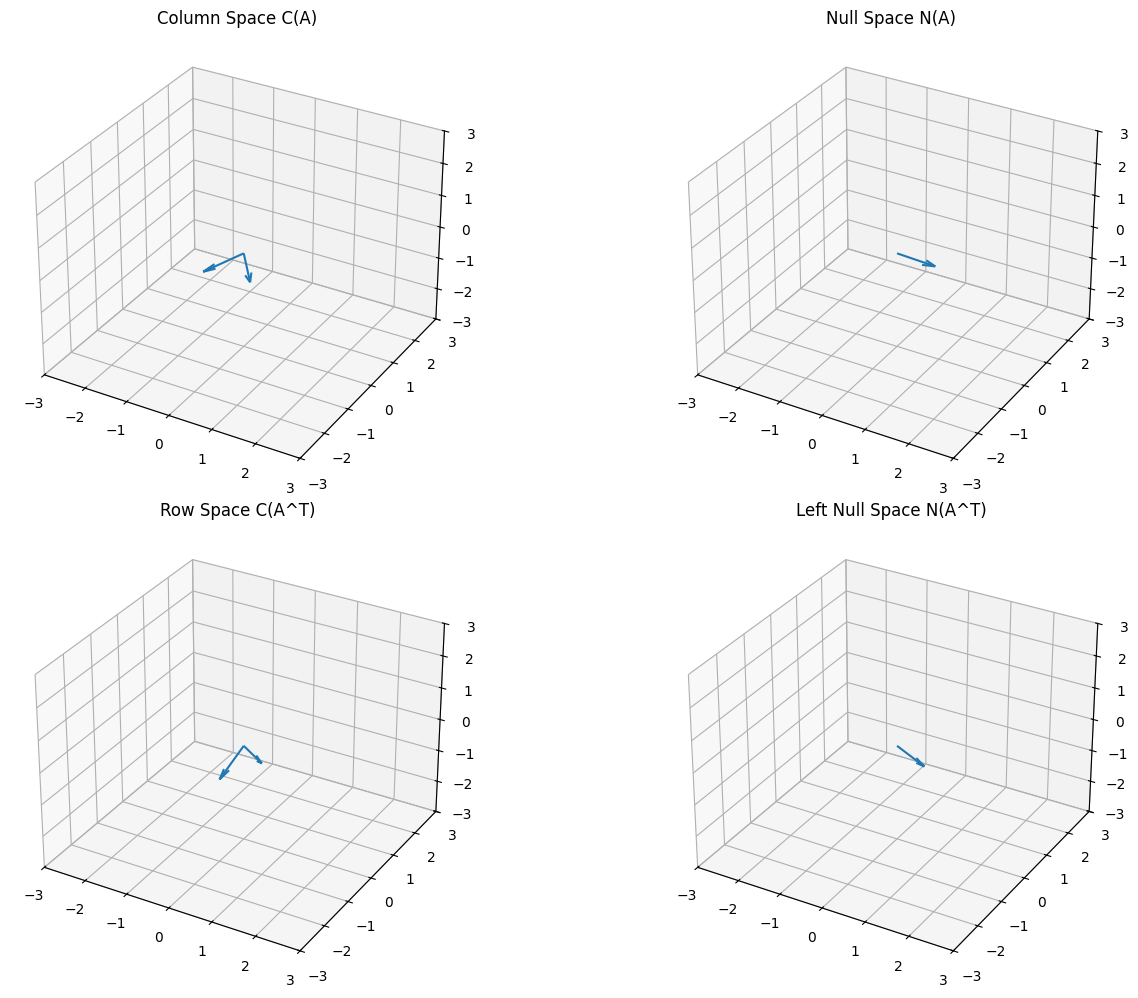

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def visualize_four_subspaces(A):
    m, n = A.shape
    if not (m in [2,3] and n in [2,3]):
        raise ValueError("Visualization supported only for 2x2, 2x3, 3x2, or 3x3 matrices.")

    # Compute Subspaces
    U, S, Vt = np.linalg.svd(A)

    # Column Space basis (in R^m)
    col_basis = U[:, :np.linalg.matrix_rank(A)]

    # Null Space basis (in R^n)
    null_basis = Vt.T[:, np.linalg.matrix_rank(A):]

    # Row Space basis (Column space of A^T)
    row_basis = Vt[:np.linalg.matrix_rank(A), :].T

    # Left Null Space basis (Null space of A^T)
    left_null_basis = U[:, np.linalg.matrix_rank(A):]

    # Visualization
    fig = plt.figure(figsize=(15, 10))

    # Helper: draw vectors in 2D/3D
    def draw_vectors(ax, basis, title):
        ax.set_title(title)
        if basis.size == 0:
            ax.text(0.5, 0.5, "Only {0} vector".format("zero"), ha="center")
            return

        if basis.shape[0] == 2:
            ax.axhline(0, color='black', linewidth=0.5)
            ax.axvline(0, color='black', linewidth=0.5)
            for v in basis.T:
                ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1)
            ax.set_xlim(-3, 3)
            ax.set_ylim(-3, 3)

        elif basis.shape[0] == 3:
            for v in basis.T:
                ax.quiver(0, 0, 0, v[0], v[1], v[2])
            ax.set_xlim([-3,3])
            ax.set_ylim([-3,3])
            ax.set_zlim([-3,3])

    # Subplot Layout
    # Column Space
    ax1 = fig.add_subplot(221, projection='3d' if m == 3 else None)
    draw_vectors(ax1, col_basis, "Column Space C(A)")

    # Null Space
    ax2 = fig.add_subplot(222, projection='3d' if n == 3 else None)
    draw_vectors(ax2, null_basis, "Null Space N(A)")

    # Row Space
    ax3 = fig.add_subplot(223, projection='3d' if n == 3 else None)
    draw_vectors(ax3, row_basis, "Row Space C(A^T)")

    # Left Null Space
    ax4 = fig.add_subplot(224, projection='3d' if m == 3 else None)
    draw_vectors(ax4, left_null_basis, "Left Null Space N(A^T)")

    plt.tight_layout()
    plt.show()

A = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [0, 1, 1]
], dtype=float)

visualize_four_subspaces(A)

### **Fundamental Theorem of Linear Algebra, Part 1**
- The column space and row space both have dimension $r$.  
- The nullspaces have dimensions $n-r$ and $m-r$.  

**Two Key Facts**
1. $\dim C(A) = \dim C(A^T) = \text{rank of } A$  
2. $\dim C(A) + \dim N(A) = n$

In [7]:
import numpy as np

def four_subspace_dimensions(A, tol=1e-12):
    A = np.array(A, dtype=float)

    # Column space dim = rank(A)
    dim_col = np.linalg.matrix_rank(A, tol)

    # Row space dim = rank(A^T)  (same value, but we compute it cleanly)
    dim_row = np.linalg.matrix_rank(A.T, tol)

    # Nullspace dim = n - rank(A)
    m, n = A.shape
    dim_null = n - dim_col

    # Left nullspace dim = m - rank(A)
    dim_left_null = m - dim_col

    return {
        "dim C(A)": dim_col,
        "dim C(A^T)": dim_row,
        "dim N(A)": dim_null,
        "dim N(A^T)": dim_left_null,
    }

def demo_subspace_dimensions(A):
    dims = four_subspace_dimensions(A)

    m = len(A)
    n = len(A[0]) if m > 0 else 0

    rank = dims["dim C(A)"]
    null_dim = dims["dim N(A)"]
    left_null_dim = dims["dim N(A^T)"]

    print("\nDIMENSIONS OF THE FOUR FUNDAMENTAL SUBSPACES")
    print(f"dim C(A)    = {dims['dim C(A)']}")
    print(f"dim C(A^T)  = {dims['dim C(A^T)']}")
    print(f"dim N(A)    = {dims['dim N(A)']}")
    print(f"dim N(A^T)  = {dims['dim N(A^T)']}")

    print("\nMATRIX SHAPE")
    print(f"Rows (m): {m}")
    print(f"Cols (n): {n}")

    print("\nRANK–NULLITY CHECKS")

    # Check 1: rank + nullity = n
    rule1_ok = (rank + null_dim == n)
    print(f"Rank(A) + Nullity(A) = {rank} + {null_dim} = {rank + null_dim}")
    print(f"Expected: {n}")
    print(f"Rule 1 OK? {rule1_ok}")

    # Check 2: rank + left-nullity = m
    rule2_ok = (rank + left_null_dim == m)
    print(f"\nRank(A) + Left-Nullity(A) = {rank} + {left_null_dim} = {rank + left_null_dim}")
    print(f"Expected: {m}")
    print(f"Rule 2 OK? {rule2_ok}")

    print("\nSTATUS")
    if rule1_ok and rule2_ok:
        print("All rank-nullity conditions satisfied.")
    else:
        print("Inconsistency detected. (This would indicate computation or input error.)")


A = [
    [1, 2, 3],
    [2, 4, 6],
    [1, 1, 0]
]

demo_subspace_dimensions(A)


DIMENSIONS OF THE FOUR FUNDAMENTAL SUBSPACES
dim C(A)    = 2
dim C(A^T)  = 2
dim N(A)    = 1
dim N(A^T)  = 1

MATRIX SHAPE
Rows (m): 3
Cols (n): 3

RANK–NULLITY CHECKS
Rank(A) + Nullity(A) = 2 + 1 = 3
Expected: 3
Rule 1 OK? True

Rank(A) + Left-Nullity(A) = 2 + 1 = 3
Expected: 3
Rule 2 OK? True

STATUS
All rank-nullity conditions satisfied.


### **Rank One and Rank Two Matrices**
- **Rank One:** Every rank-one matrix = one column times one row: $A = uv^T$  
- **Rank Two:** Rank One + Rank One

In [5]:
import numpy as np

def rank_showcase():
    # Rank-1 Construction
    u = np.array([1, 2, -1], dtype=float)       # 3×1
    v = np.array([4, -2], dtype=float)          # 2×1
    A1 = np.outer(u, v)                          # rank-1

    # Rank-2 Construction (rank-1 + rank-1)
    u2 = np.array([0, 1, 3], dtype=float)
    v2 = np.array([2, 1], dtype=float)
    A2 = A1 + np.outer(u2, v2)

    # Rank Checks
    r1 = np.linalg.matrix_rank(A1)
    r2 = np.linalg.matrix_rank(A2)

    return {
        "rank_1_matrix_A": A1,
        "rank_of_A": r1,

        "rank_2_matrix_B": A2,
        "rank_of_B": r2,

        "components": {
            "u": u,
            "v": v,
            "u2": u2,
            "v2": v2
        }
    }

out = rank_showcase()

print("Rank 1 Matrix")
print(out["rank_1_matrix_A"])
print("Rank:", out["rank_of_A"])

print("\nRank 2 Matrix")
print(out["rank_2_matrix_B"])
print("Rank:", out["rank_of_B"])

Rank 1 Matrix
[[ 4. -2.]
 [ 8. -4.]
 [-4.  2.]]
Rank: 1

Rank 2 Matrix
[[ 4. -2.]
 [10. -3.]
 [ 2.  5.]]
Rank: 2


**Key Ideas**
1. The $r$ pivot rows of $R$ are a basis for the row spaces of $R$ and $A$ (same space).  
2. The $r$ pivot columns of $A$ are a basis for its column space $C(A)$.  
3. The $n-r$ special solutions are a basis for the nullspaces of $A$ and $R$ (same space).  
4. If $EA = R$, then the last $m-r$ rows of $E$ are a basis for the left nullspace of $A$.